In [ ]:
import numpy as np

all_data = np.load('./data/km_flow/km_flow.npy')
with np.load("./data/km_flow/km_flow_sampled.npz", allow_pickle=True) as f:
    sampled_data = f['u3232'].copy().astype(np.float32)
    idx_lst = f['idx_lst'].copy()

In [ ]:
import matplotlib.pyplot as plt

# 创建一个256x256的随机压力值矩阵（示例数据）
pressure_matrix = all_data[0][0]

# 可视化压力值矩阵
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(pressure_matrix, cmap='magma', origin='lower')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
# plt.axis('off')
plt.title('Velocity Field')
plt.show()

In [ ]:
with np.load("./data/km_flow_sampled.npz", allow_pickle=True) as f:
    print(f['u3232'].shape)

In [ ]:
import matplotlib.pyplot as plt

# 创建一个256x256的随机压力值矩阵（示例数据）
pressure_matrix = sampled_data[2][0]

# 可视化压力值矩阵
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(pressure_matrix, cmap='magma', origin='lower')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
# plt.axis('off')
plt.title('Pressure')
plt.show()

In [2]:
from dataset import KMFlowDataset
import torch
from neuralop.models import TFNO


device = 'cuda'

In [3]:
dataset = KMFlowDataset(data_dir="./data/km_flow/", batch_size=32)
train_loader, valid_loader, test_loader = dataset.train_loader, dataset.valid_loader, dataset.test_loader    

model = TFNO(
    n_modes=(256, 256),
    in_channels=1,
    out_channels=1,
    hidden_channels=32, 
    projection_channels=64, 
    factorization='tucker', 
    rank=0.42
)

model = model.to('cuda')
model.load_state_dict(torch.load('./logs/km_flow/07_04/FNO_18_30_51/best_model.pth'))


<All keys matched successfully>

In [4]:
X_test, y_test = test_loader.dataset[0]

model = model.to(device)
y_pred = model(X_test.to(device).unsqueeze(0)).squeeze(0).cpu().detach().numpy()

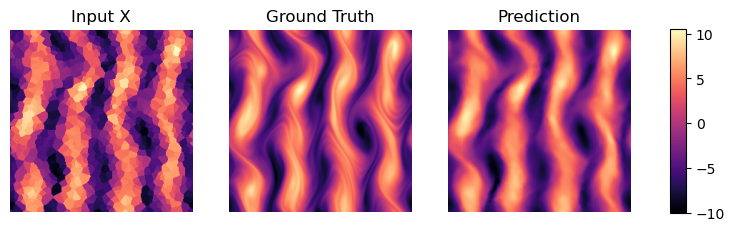

In [13]:
import matplotlib.pyplot as plt

# 可视化压力值矩阵
fig = plt.figure(figsize=(8, 8), dpi=100)

ax = fig.add_subplot(1, 3, 1)
im1 = ax.imshow(X_test[0], cmap='magma', origin='lower')
ax.axis('off')
ax.title.set_text('Input X')

ax = fig.add_subplot(1, 3, 2)
im2 = ax.imshow(y_test[0], cmap='magma', origin='lower')
ax.axis('off')
ax.title.set_text('Ground Truth')

ax = fig.add_subplot(1, 3, 3)
im3 = ax.imshow(y_pred[0], cmap='magma', origin='lower')
ax.axis('off')
ax.title.set_text('Prediction')

# 合并colorbar
cax = fig.add_axes([0.95, 0.38, 0.02, 0.23])
fig.colorbar(im3, cax=cax)

# plt.axis('off')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 创建一个256x256的随机压力值矩阵（示例数据）
pressure_matrix = y_pred[0]

# 可视化压力值矩阵
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(pressure_matrix, cmap='magma', origin='lower')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
# plt.axis('off')
plt.title('Velocity Field')
plt.show()

In [2]:
dataset = KMFlowDataset(data_dir="./data/km_flow/", batch_size=32)
train_loader, valid_loader, test_loader = dataset.train_loader, dataset.valid_loader, dataset.test_loader    

model = TFNO(
    n_modes=(256, 256),
    in_channels=1,
    out_channels=1,
    hidden_channels=32, 
    projection_channels=64, 
    factorization='tucker', 
    rank=0.42
)

model.load_state_dict(torch.load('best_model.pth'))

<All keys matched successfully>